## What and Why Transformers?
Transformers in natural language processing (NLP) are a type of deep learning model that use "self-attention mechianisms" to analyze and process natural language data. They are encoder-decoder models that can be used for many applications, including machine translation (Seq2Seq task).

As we know encoder decoder having less accuracy with respect to long sentences because of less context to initial timestamp words 

To solve this we came up with Attention Mechanism which uses Bidirectional LSTM RNN which improves the accuracy of large sentences but here also as we are passing each word at a timestamp
- it's not "Scalable solution" as for huge dataset with respect to training as parallely we can't send all the words in a sentence
- other problem is as we are passing each word at a timestamp converting the word to vector using enbedding layers, so for each word will be getting a fixed dimension vector but there will be no contextual relationship between one vector to another 

To solve this above "Transformers" came into picture, it not uses LSTM RNN but it uses "Self-Attention Module" where all the words will be parallely sent to encoder decoder and it has "Contextual vector embedding" for each word having the context relation of other word related to it

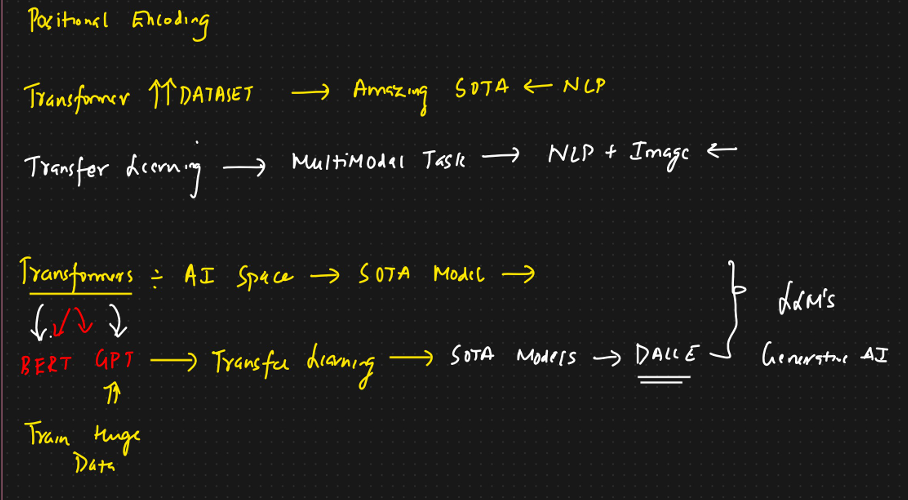

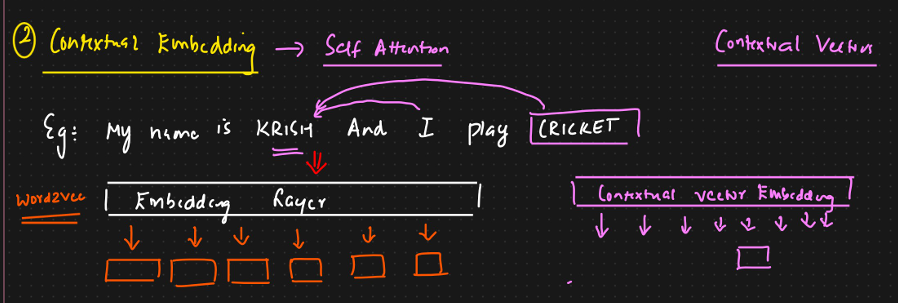

## Basic Architecture
- transformers used to solve Seq2Seq task like language translation from english to french
- it also follows encoder decoder architecture where we may have multiple encoders decoders where our input will go from one encoder to other encoder

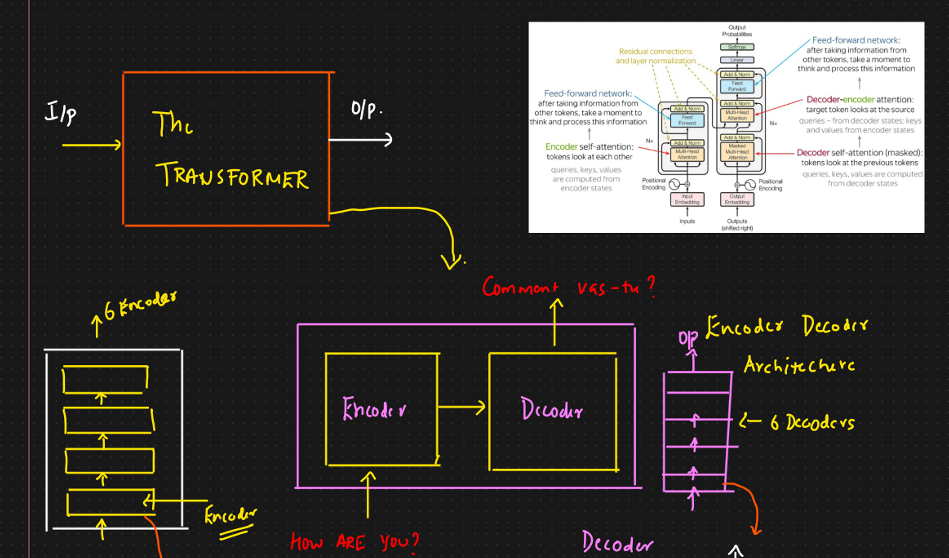

- inside each encoders will be having one self attention layer and one feed forward neural network
- inside each decoder will be having one layer of self attention, one layer of feed forward neural network and one more layer of encoder-decoder attention

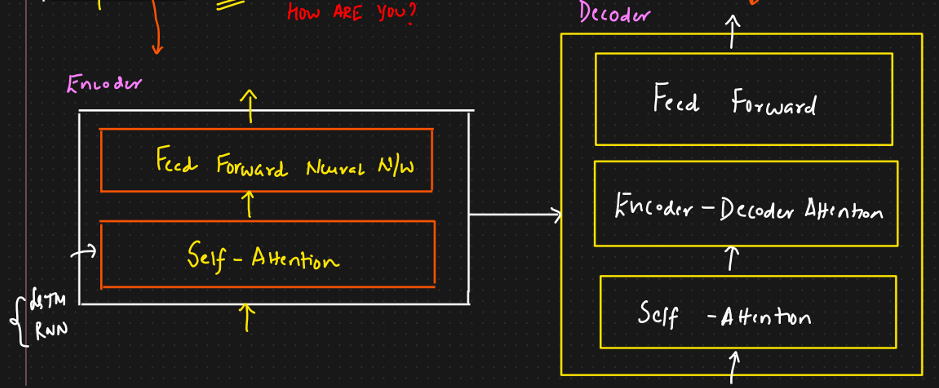

### Encoder
- in research papers, they have used 6 encoders and 6 decoders which are stacked one by one 
- in encoder we pass each word after coverting into vector by passing them through embedding layers, it will go to self attention layer which will convert the embedding vector to contextual vector and from there it will get converted into a different vectors known as Contextual vectors
    - here since we have self attention layer, all the words will be passed parallely
- the difference between the embedding layer vectors and contextual vectors is as contextual vector will having the context of different words also
- now will passing each contextual vector to feed forward neural network and getting the output as vectors which again will be send to another encoder

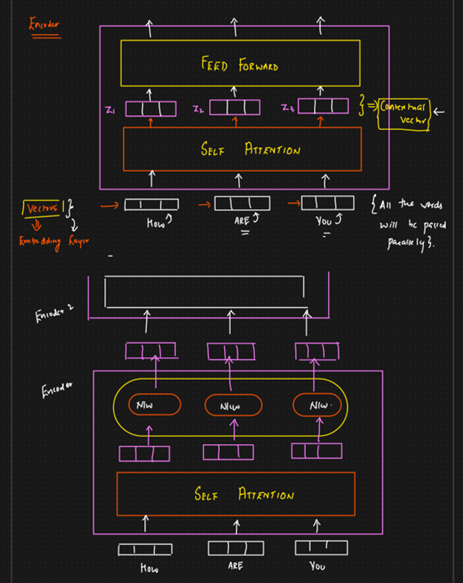

#### Self Attention inside Encoder
Self-Attention also known as "Scaled dot-product attention", is a crucial mechanism in the transformer architecture that "allows the model to weigh the importance of different tokens in the input sequence relative to each other"

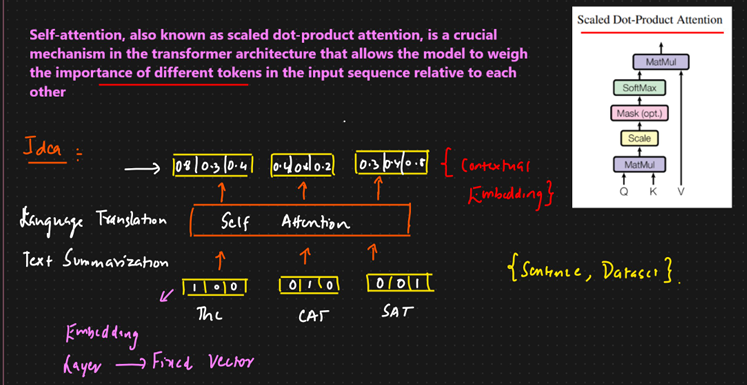

We need to drive three important vectors: Queries (Q), Keys (K) and Values (V)
- for each token will be making a model which will compute these 3 important vectors (Q,K,V)

**Query Vectors (Q)**
- Role: Query vector represent the token for which we are calculating the attention. They help determine the importance of other tokens in the context of the current token.
- Importance:   
    - Focus Determination: Queries help the model decide which parts of the sequence to focus on for each specific token. By calculating the dot product between a query vector and all key vectors, the model assesses how much attention to give to each token relative to the current token
    - Contextual Understanding: Queries contribute to understanding the relationship netween the current token and the rest of the sequence, which is essential for capturing dependencies and context

**Key Vectors (K)**
- Role: Key vectors represent all the tokens in the sequence and are used to compare with the query vectors to calculate attention score
- Importance:
    - Relevance Measurement: Keys are compared with queries to measure the relevance or compatibility of each token with the current token. This comparison helps in determining how much attention each token should receive
    - Information Retrieval: Keys play a critial role in retrieving the most relevant information from the sequence by providing a basis for the attention mechanism to compute similarity scores

**Value Vectors (V)**
- Role: Value vectors hold the actual information that will be aggregated to form the output of the attention mechanism
- Importance:
    - Information Aggregation: Values contain the data that will be weighted by the attention scores. The weighted sum of values forms the output of the self-attention mechanism, which is then passed on to the next layers in the network
    - Context Preservation: By weighting the values according to the attention scores, the model preserves and aggregates relevant context from the entire sequence, which is crucial for tasks like translation, summarization, and more

So basically we have to create a model which will convert normal vector embedding to contextual vector embeddings that model is called as "self-attention module" and will follow some steps:

1. **token embedding:** convert the words in normal word embedding vectors of fixed dimension

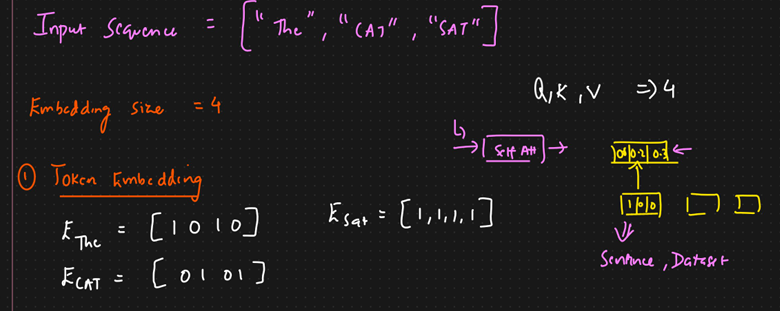

2. **linear embedding:** create Q,K,V by multiplying the embedding by learned weights matrices W(Q), W(K), W(V) which means one word embedding will do dot operation with weights will get that vectors 
    - means if take weight W(Q) then will get Query vector (Q) and so on
    - remember that here we have learned weights which means will initial some weights and then do backward propogation to get the best weights which will result in best vectors
    - here we have initialized the weights matrices with identity martices

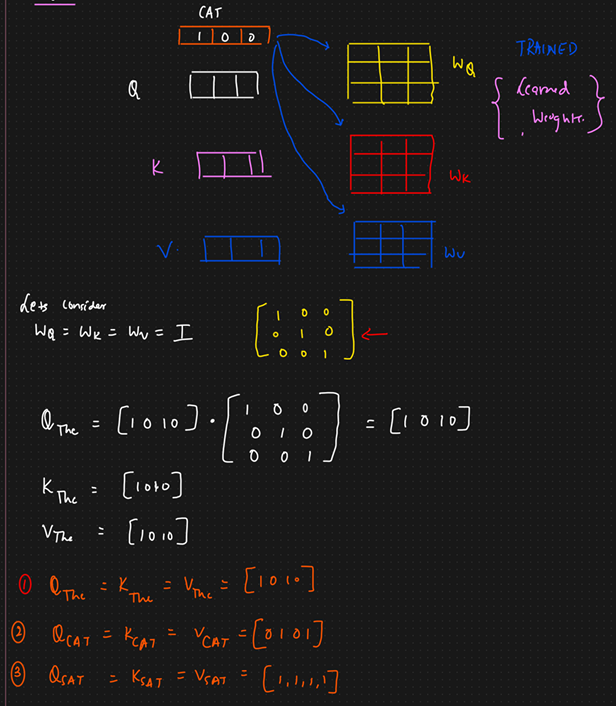

3. **Compute Attention Scores:** we need to do the dot operation of query vector and all key vector to get the importance of each token with current token
    - as both the query and key vector are of same dimension we need to take the transpose of key vector to perform the dot operation

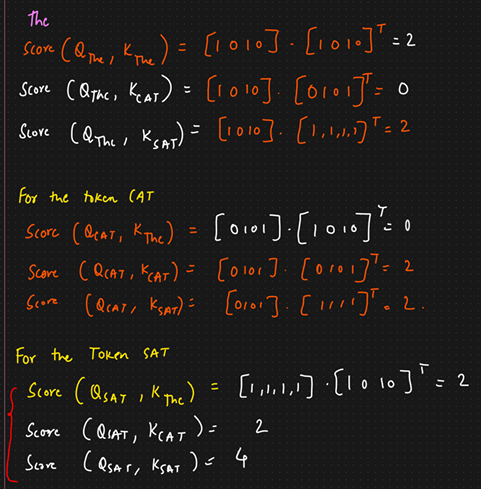

4. **Scaling and computing attention weights by applying softmax:** we take up the scores and scale down the by dividing the scores by the Sqrt(d(K)) here d(k) meand dimension of key vectors
    - Scaling in the attention mechanism is crucial to prevent the dot product from growing to large to ensure stable gradiants during training here we are talking about the dot product of query and key vector
    - as the dimension of key d(k) is getting large and we don't scale it then two problems may arise:
        - Gradient Exploding
        - Softmax Saturation: similar to vanishing gradient problem, single token might have assigned the most of the weights and other might have near to 0 so when do backward propogation the weight will not get updated
        - after applying scaling, the attention weights are more balanced 
    - Stabilizing Training: Scaling prevents extremely large dot products, which helps in stabilizing the gradients during backpropogation, making the training process more stable and efficient
    - Preventing Saturation: By scaling the dot products, the softmax function produces more balanced attention weights, preventing the model from focusing too heavily on a single token and ignoring others.
    - Improved Learning: Balanced attention weights enable the model to learn representations by considering multiple relevant tokens in the sequences, leading to better performance on tasks that require context understanding
    - Scaling ensures that the dot products are kept within a range that allows the softmax function to operate effectively, providing a more balanced distribution of attention weights and improving the overall learning process of the model

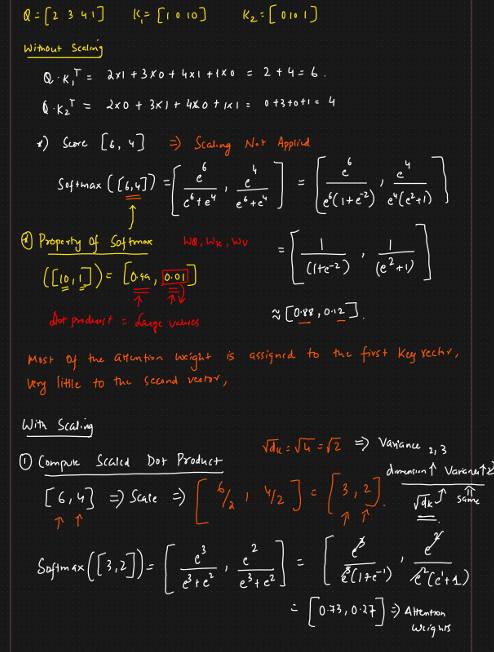

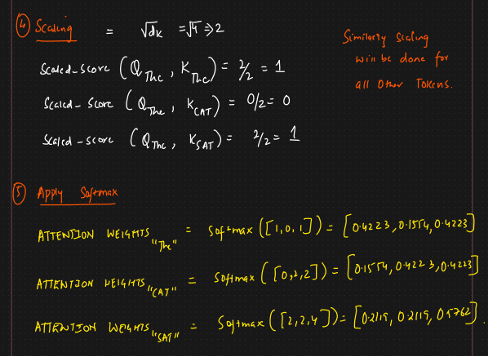

5. **Weighted Sum of Values:** we multiple the attention weights by corresponding value vectors (V)

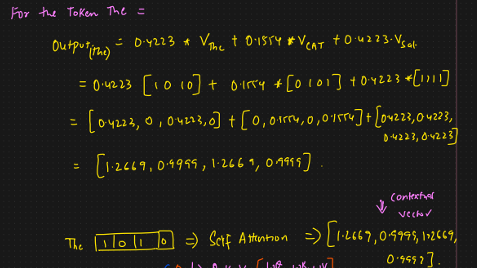